In [28]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("Cereals.csv")

In [29]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [30]:
#1) Create a table with the 5-number summary of all the numeric attributes.
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [31]:
#2) For each of the numeric attributes (proteins upto vitamins) , identify and replace all missing data(indicated with -1) with the arithmetic mean of the attribute.
df["carbo"].replace({-1 : df["carbo"].mean()},inplace = True)
df["sugars"].replace({-1 : df["sugars"].mean()},inplace = True)
df["potass"].replace({-1 : df["potass"].mean()},inplace = True)

In [32]:
#3) Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective?
print("Yes,the strategy used in dealing with missing values was effective as there are no -1 values present anymore")
dfpro.describe()

Yes,the strategy used in dealing with missing values was effective as there are no -1 values present anymore


,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474
std,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000
25%,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000
50%,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [33]:
#4) For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy data with the median of attribute.
import numpy as np
df1 = df.copy()
for i in ["protein",'fat','sodium','fiber','carbo','sugars','potass','vitamins']:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    lo = q1-(1.5*iqr)
    up = q3+(1.5*iqr)
    outl = df[df[i]>up][i]
for o in outl:
    df[i].replace(o,df[i].median(),inplace=True)

In [34]:
#5) Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was effective? 
print("Yes, I think the strategy used in dealing with noisy values was effective")
df.describe()


Yes, I think the strategy used in dealing with noisy values was effective


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,22.368421,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,7.723284,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,25.000000,3.000000,1.500000,1.500000,93.704912


In [35]:
#6) Cross tabulate the type of cereal (hot vs cold) against the manufacturer
pd.crosstab(df['type'],df['mfr'])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


In [36]:
#7) Which is the cereal with the best rating, worst rating?
print("the cereal with the best rating is All-Bran_with_Extra_Fiber")
df.nlargest(1,columns=['rating'])

the cereal with the best rating is All-Bran_with_Extra_Fiber


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.5,93.704912


In [37]:
print("the cereal with the worst rating is Cap'n'Crunch")
df.nsmallest(1,columns=['rating'])

the cereal with the worst rating is Cap'n'Crunch


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
9,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851


<AxesSubplot:xlabel='type', ylabel='rating'>

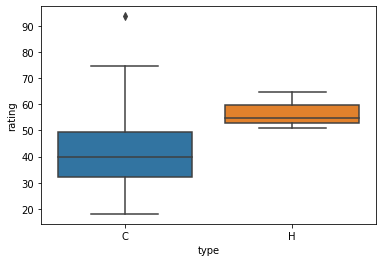

In [38]:
#8) Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 
sns.boxplot(data=df,x='type',y='rating')

In [45]:
#9) Is there a relation between sugars, calories, carbs, and fat?
print("there is moderate relation between sugars,calories and fat. Also, there is moderate relation between carbohydrates and suagar")
nut=list(['sugars','calories','carbo','fat'])
df[nut].corr()

there is moderate relation between sugars,calories and fat. Also, there is moderate relation between carbohydrates and suagar


,sugars,calories,carbo,fat
sugars,1.000000,0.574304,-0.501056,0.300349
calories,0.574304,1.000000,0.207615,0.510630
carbo,-0.501056,0.207615,1.000000,-0.312341
fat,0.300349,0.510630,-0.312341,1.000000


In [46]:
#10) Which manufacturers produce cereal with highest calories?
print("Mueslix manufacturers produces ceral with highest calories")
df.nlargest(3,columns=['calories'])

Mueslix manufacturers produces ceral with highest calories


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
45,Mueslix_Crispy_Blend,K,C,160,3,2,150,3.0,17.0,13.0,160.0,25,3,1.5,0.67,30.313351
43,"Muesli_Raisins,_Dates,_&amp;_Almonds",R,C,150,4,3,95,3.0,16.0,11.0,170.0,25,3,1.0,1.00,37.136863
44,"Muesli_Raisins,_Peaches,_&amp;_Pecans",R,C,150,4,3,150,3.0,16.0,11.0,170.0,25,3,1.0,1.00,34.139765


calories and consumer rating show moderate correlation
AxesSubplot(0.125,0.125;0.62x0.755)


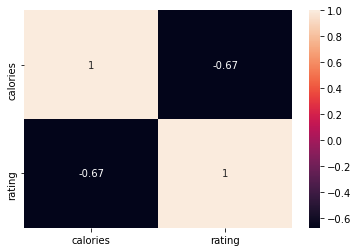

In [47]:
#11) Use correlation tests and visualization to identify if the two variables calories and consumer rating associated 
print("calories and consumer rating show moderate correlation")
new1df=df.filter(["calories",'rating'],axis=1)
cor1df=new1df.corr()
varHeatMap1=sns.heatmap(cor1df, annot=True)
print(varHeatMap1)

shelf and calories rating show very low correlation
AxesSubplot(0.125,0.125;0.62x0.755)


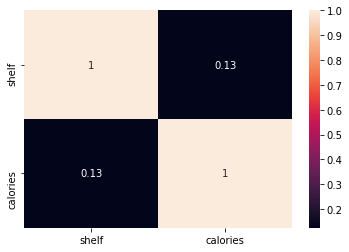

In [48]:
#12) Use correlation tests and visualization to identify if the two variables shelf and calories associated?
print("shelf and calories rating show very low correlation")
new2df=df.filter(["shelf","calories"],axis=1)
cor2df=new2df.corr()
varHeatMap2=sns.heatmap(cor2df, annot=True)
print(varHeatMap2)

N maunfacturer has high ratings compared to others


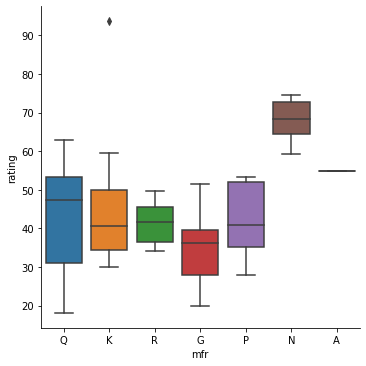

In [49]:
#13) Is there a relation between manufacturer and rating?
print("N maunfacturer has high ratings compared to others")
sns.catplot(x="mfr", y="rating",kind = 'box', data=df);

In [50]:
#14) Which nutrients are essential for a good rating for a cereal?
attr=["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]
vargoodrat=df[df['rating']>50]
cor_df=vargoodrat[attr].corr()
cor_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.480686,0.329097,0.260754,-0.398579,0.672810,0.398748,-0.300981,0.332095
protein,0.480686,1.000000,0.598256,0.567629,0.153189,0.022728,0.146061,0.245369,0.311999
fat,0.329097,0.598256,1.000000,0.306848,-0.045681,-0.048001,0.300515,0.081571,0.126428
sodium,0.260754,0.567629,0.306848,1.000000,0.324466,-0.152710,0.063277,0.368679,0.599013
fiber,-0.398579,0.153189,-0.045681,0.324466,1.000000,-0.587833,0.001711,0.932480,0.280307
carbo,0.672810,0.022728,-0.048001,-0.152710,-0.587833,1.000000,-0.215433,-0.562263,-0.241774
sugars,0.398748,0.146061,0.300515,0.063277,0.001711,-0.215433,1.000000,0.081376,0.519215
potass,-0.300981,0.245369,0.081571,0.368679,0.932480,-0.562263,0.081376,1.000000,0.294299
vitamins,0.332095,0.311999,0.126428,0.599013,0.280307,-0.241774,0.519215,0.294299,1.000000
